In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

/kaggle/input/girl-image/sally2.jpg


# Image Processing with Keras in Python

**Course Description**

Image processing requires deep learning methods that use data to train neural network algorithms to do various machine learning tasks. Convolutional neural networks (CNNs) are particularly powerful neural networks which you'll use to classify different types of objects for the analysis of images. This four-hour course will teach you how to construct, train, and evaluate CNNs using Keras.

Turning images into data and teaching neural networks to classify them is a challenging element of deep learning with extensive applications throughout business and research, from helping an eCommerce site manage inventory more easily to allowing cancer researchers to quickly spot dangerous melanoma.

The first chapter of this course covers how images can be seen as data, and how you can use Keras to train a neural network to classify objects found in images.

The second chapter will cover convolutions, a fundamental part of CNNs. You’ll learn how they operate on image data and learn how to train and tweak your Keras CNN using test data. Later chapters go into more detail and teach you how to create a deep learning network.

You’ll finish the course by learning the different ways that you can track how well a CNN is doing and how you can improve their performance. At this point, you’ll be able to build Keras neural networks, optimize them, and visualize their responses across a range of applications.


## Image processing with Neural Networks

Convolutional neural networks use the data that is represented in images to learn. In this chapter, we will probe data in images, and we will learn how to use Keras to train a neural network to classify objects that appear in images.

### Introducing convolutional neural networks

#### Images as data: visualizations

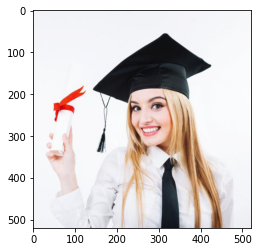

In [4]:
# Import matplotlib
import matplotlib.pyplot as plt

# Load the image
data = plt.imread('/kaggle/input/girl-image/sally2.jpg')


# Display the image
plt.imshow(data)
plt.show()

In [5]:
data.shape

(520, 520, 3)

#### Images as data: changing images
To modify an image, you can modify the existing numbers in the array. In a color image, you can change the values in one of the color channels without affecting the other colors, by indexing on the last dimension of the array.

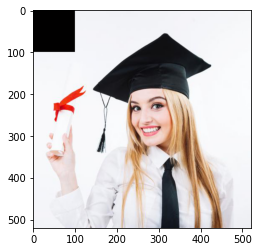

In [6]:
# Set the red channel in this part of the image to 1
data[:100, :100, 0] = 1

# Set the green channel in this part of the image to 0
data[:100, :100, 1] = 0

# Set the blue channel in this part of the image to 0
data[:100, :100, 2] = 0

# Visualize the result
plt.imshow(data)
plt.show()

### Classifying images

#### Using one-hot encoding to represent images
Neural networks expect the labels of classes in a dataset to be organized in a one-hot encoded manner: each row in the array contains zeros in all columns, except the column corresponding to a unique label, which is set to 1.

The fashion dataset contains three categories:

Shirts
Dresses
Shoes

In this exercise, you will create a one-hot encoding of a small sample of these labels.

In [7]:
labels =  ['shoe', 'shirt', 'shoe', 'shirt', 'dress', 'dress', 'dress']

# The number of image categories
n_categories = 3

# The unique values of categories in the data
categories = np.array(["shirt", "dress", "shoe"])

# Initialize ohe_labels as all zeros
ohe_labels = np.zeros((len(labels), n_categories))

# Loop over the labels
for ii in range(len(labels)):
    # Find the location of this label in the categories variable
    jj = np.where(categories == labels[ii])
    # Set the corresponding zero to one
    ohe_labels[ii,jj] = 1

print(ohe_labels)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


#### Evaluating a classifier

In [8]:
# Calculate the number of correct predictions
# number_correct = (test_labels * predictions).sum()
# print(number_correct)

# Calculate the proportion of correct predictions
# proportion_correct = number_correct/len(predictions)
# print(proportion_correct)

### Classification with Keras

In [9]:
from keras.datasets import fashion_mnist

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load  dataset from keras, split into train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

4431872/4422102 [==============================] - 0s 0us/step


#### Build a neural network

In [10]:
# Imports components from Keras
from keras.models import Sequential
from keras.layers import Dense

# Initializes a sequential model
model = Sequential()

# First layer
model.add(Dense(10, activation='relu', input_shape=(784,)))

# Second layer
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

2023-01-10 06:24:51.114478: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


#### Compile a neural network

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### Fitting a neural network model to clothing data

In [12]:
# Reshape the train data to two-dimensional array
train_data = x_train.reshape(60000, 784)

# Fit the model
model.fit(train_data, y_train, validation_split=0.2, epochs=5)

2023-01-10 06:24:51.677056: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.8122 - accuracy: 0.7025 - val_loss: 0.5643 - val_accuracy: 0.7951
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5330 - accuracy: 0.8091 - val_loss: 0.5347 - val_accuracy: 0.8188
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4898 - accuracy: 0.8324 - val_loss: 0.5372 - val_accuracy: 0.8205
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4639 - accuracy: 0.8407 - val_loss: 0.4814 - val_accuracy: 0.8345
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4482 - accuracy: 0.8449 - val_loss: 0.4773 - val_accuracy: 0.8376


#### Cross-validation for neural network evaluation

In [13]:
# Reshape test data
test_data = x_test.reshape(10000, 784)

# One hot encoding of test labels
test_labels = tf.keras.utils.to_categorical(y_test)

# Evaluate the model
model.evaluate(test_data, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5039 - accuracy: 0.8246


[0.5038722157478333, 0.8245999813079834]

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 8,180
Trainable params: 8,180
Non-trainable params: 0
_________________________________________________________________


In [15]:
predictions = model.predict(test_data)

# Calculate the number of correct predictions
number_correct = (y_test * predictions).sum()
print(f"Number of correct predictions is {number_correct} out of {len(test_data)} samples.")

# Calculate the proportion of correct predictions
proportion_correct = number_correct/len(predictions)
print(f"The correct percentage rate is {round(proportion_correct, 2)}")

Number of correct predictions is 7493.69140625 out of 10000 samples.
The correct percentage rate is 0.75


## Using Convolutions
Convolutions are the fundamental building blocks of convolutional neural networks. In this chapter, you will be introducted to convolutions and learn how they operate on image data. You will also see how you incorporate convolutions into Keras neural networks

### Convolutions

#### One dimensional convolutions
A convolution of an one-dimensional array with a kernel comprises of taking the kernel, sliding it along the array, multiplying it with the items in the array that overlap with the kernel in that location and summing this product.

In [16]:
array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
kernel = np.array([1, -1, 0])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Output array
for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+3]).sum()

# Print conv
print(conv)

[ 1 -1  1 -1  1 -1  1 -1  0  0]


#### Image convolutions
The convolution of an image with a kernel summarizes a part of the image as the sum of the multiplication of that part of the image with the kernel. In this exercise, you will write the code that executes a convolution of an image with a kernel using Numpy. 

Given a black and white image that is stored in the variable im, write the operations inside the loop that would execute the convolution with the provided kernel.

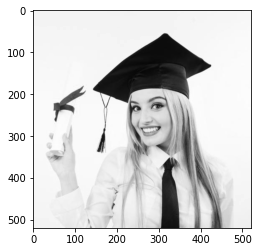

In [17]:
from skimage.color import rgb2gray

image = plt.imread('/kaggle/input/girl-image/sally2.jpg')

im = rgb2gray(image)
plt.imshow(im, cmap=plt.cm.gray)
plt.show()

In [18]:
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
result = np.zeros(im.shape)

# Output array
for ii in range(im.shape[0] - 3):
    for jj in range(im.shape[1] - 3):
        result[ii, jj] = (im[ii:ii+3, jj:jj+3] * kernel).sum()

# Print result
print(result)

[[4.76619412 4.76619412 4.76619412 ... 0.         0.         0.        ]
 [4.76619412 4.76619412 4.76619412 ... 0.         0.         0.        ]
 [4.76619412 4.76619412 4.76619412 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [19]:
result.shape

(520, 520)

#### Defining image convolution kernels
In the previous exercise, you wrote code that performs a convolution given an image and a kernel. n this exercise, you will be asked to define the kernel that finds a particular feature in the image.

In [20]:
# kernel that finds a vertical line in images:
kernel = np.array([[-1, 1, -1], 
                   [-1, 1, -1], 
                   [-1, 1, -1]])

# kernel that finds a light spot surrounded by dark pixels.
kernel = np.array([[-1, -1, -1], 
                   [-1, 1, -1],
                   [-1, -1, -1]])

# kernel that finds a dark spot surrounded by bright pixels.
kernel = np.array([[1, 1, 1], 
                   [1, -1, 1],
                   [1, 1, 1]])

### Implementing image convolutions

#### Convolutional network for image classification
Convolutional networks for classification are constructed from a sequence of convolutional layers (for image processing) and fully connected (Dense) layers (for readout). In this exercise, you will construct a small convolutional network for classification of the data from the fashion dataset

In [21]:
# Import the necessary components from Keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# Initialize the model object
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(10, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))

# Flatten the output of the convolutional layer
model.add(Flatten())
# Add an output layer for the 10 categories
model.add(Dense(10, activation='softmax'))

#### Training a CNN to classify clothing types
Before training a neural network it needs to be compiled with the right cost function, using the right optimizer. During compilation, you can also define metrics that the network calculates and reports in every epoch. Model fitting requires a training data set, together with the training labels to the network.

In [22]:
# Compile the model 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model on a training set
model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4668 - accuracy: 0.8367 - val_loss: 0.3818 - val_accuracy: 0.8668
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3334 - accuracy: 0.8832 - val_loss: 0.3302 - val_accuracy: 0.8830
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2936 - accuracy: 0.8954 - val_loss: 0.3117 - val_accuracy: 0.8885
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2682 - accuracy: 0.9038 - val_loss: 0.3111 - val_accuracy: 0.8883
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2476 - accuracy: 0.9117 - val_loss: 0.3010 - val_accuracy: 0.8942
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2312 - accuracy: 0.9174 - val_loss: 0.2965 - val_accuracy: 0.8975
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2162 - accuracy: 0.9224 - val_loss: 0.3095 - val_accuracy:

#### Evaluating a CNN with test data
To evaluate a trained neural network, you should provide a separate testing data set of labeled images

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.32143786549568176
Test accuracy: 0.8925999999046326


In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 10)        100       
_________________________________________________________________
flatten (Flatten)            (None, 6760)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                67610     
Total params: 67,710
Trainable params: 67,710
Non-trainable params: 0
_________________________________________________________________


### Tweaking your convolutions

#### Add padding to a CNN
Padding allows a convolutional layer to retain the resolution of the input into this layer. This is done by adding zeros around the edges of the input image, so that the convolution kernel can overlap with the pixels on the edge of the image.

In [25]:
img_rows = 28
img_cols = 28

# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
                 input_shape=(img_rows, img_cols, 1), 
                 padding='same'))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

#### Add strides to a convolutional network.
The size of the strides of the convolution kernel determines whether the kernel will skip over some of the pixels as it slides along the image. This affects the size of the output because when strides are larger than one, the kernel will be centered on only some of the pixels.

In [26]:
# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
              input_shape=(img_rows, img_cols, 1), 
              strides=2))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

With strides set to 2, the network skips every other pixel.

#### Calculate the size of convolutional layer output
Zero padding and strides affect the size of the output of a convolution.

What is the size of the output for an input of size 256 by 256, with a kernel of size 4 by 4, padding of 1 and strides of 2?

O=((I−K+2P)/S)+1

where:
- I=sizeoftheinput
- K=sizeofthekernel
- P=sizeofthezeropadding
- S=strides

Thus:

O = ((256-4 + 2x1)/2)+1 = 128

## Going Deeper
Convolutional neural networks gain a lot of power when they are constructed with multiple layers (deep networks). In this chapter, you will learn how to stack multiple convolutional layers into a deep network. You will also learn how to keep track of the number of parameters, as the network grows, and how to control this number.

#### Creating a deep learning network
A deep convolutional neural network is a network that has more than one layer. Each layer in a deep network receives its input from the preceding layer, with the very first layer receiving its input from the images used as training or test data.

Here, you will create a network that has two convolutional layers.

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()

# Add a convolutional layer (15 units)
model.add(Conv2D(15, kernel_size=2, activation='relu', input_shape=input_shape))


# Add another convolutional layer (5 units)
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#### Train a deep CNN to classify clothing images

In [28]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model to training data 
model.fit(x_train, y_train, validation_split=0.2, epochs=3, batch_size=10)

# Evaluate the model on test data
model.evaluate(x_test, y_test, batch_size=10)

Epoch 1/3
4800/4800 [==============================] - 26s 5ms/step - loss: 0.4699 - accuracy: 0.8335 - val_loss: 0.3655 - val_accuracy: 0.8717
Epoch 2/3
4800/4800 [==============================] - 27s 6ms/step - loss: 0.3421 - accuracy: 0.8773 - val_loss: 0.3328 - val_accuracy: 0.8809
Epoch 3/3
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3726 - accuracy: 0.8589


[0.37264829874038696, 0.8589000105857849]

#### How many parameters in a deep CNN?

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 27, 27, 15)        75        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 5)         305       
_________________________________________________________________
flatten_3 (Flatten)          (None, 3380)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                33810     
Total params: 34,190
Trainable params: 34,190
Non-trainable params: 0
_________________________________________________________________


### Reducing parameters with pooling

#### Keras pooling layers
As we have seen before, CNNs can have a lot of parameters. Pooling layers are often added between the convolutional layers of a neural network to summarize their outputs in a condensed manner, and reduce the number of parameters in the next layer in the network. This can help us if we want to train the network more rapidly, or if we don't have enough data to learn a very large number of parameters.

A pooling layer can be described as a particular kind of convolution. For every window in the input it finds the maximal pixel value and passes only this pixel through

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D

model = Sequential()

# Add a convolutional layer (15 units)
model.add(Conv2D(15, kernel_size=2, activation='relu', input_shape=input_shape))

# Add a pooling operation
model.add(MaxPool2D(2))

# Add another convolutional layer (5 units)
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 27, 27, 15)        75        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 15)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 5)         305       
_________________________________________________________________
flatten_4 (Flatten)          (None, 720)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                7210      
Total params: 7,590
Trainable params: 7,590
Non-trainable params: 0
_________________________________________________________________


#### Train a deep CNN with pooling to classify images

In [31]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model to training data 
model.fit(x_train, y_train, validation_split=0.2, epochs=3, batch_size=10)

# Evaluate the model on test data
model.evaluate(x_test, y_test, batch_size=10)

Epoch 1/3
4800/4800 [==============================] - 29s 6ms/step - loss: 0.4848 - accuracy: 0.8271 - val_loss: 0.3682 - val_accuracy: 0.8673
Epoch 2/3
4800/4800 [==============================] - 26s 6ms/step - loss: 0.3534 - accuracy: 0.8740 - val_loss: 0.3856 - val_accuracy: 0.8601
Epoch 3/3
1000/1000 [==============================] - 3s 3ms/step - loss: 0.3434 - accuracy: 0.8766


[0.3434171974658966, 0.8766000270843506]

## Understanding and Improving Deep Convolutional Networks
There are many ways to improve training by neural networks. In this chapter, we will focus on our ability to track how well a network is doing, and explore approaches towards improving convolutional neural networks.

### Tracking learning

#### Plot the learning curves
During learning, the model will store the loss function evaluated in each epoch. Looking at the learning curves can tell us quite a bit about the learning process. In this exercise, you will plot the learning and validation loss curves for a model that you will train.

Epoch 1/3
4800/4800 [==============================] - 28s 6ms/step - loss: 0.3080 - accuracy: 0.8893 - val_loss: 0.3357 - val_accuracy: 0.8832
Epoch 2/3
4800/4800 [==============================] - 30s 6ms/step - loss: 0.2954 - accuracy: 0.8939 - val_loss: 0.3292 - val_accuracy: 0.8829
Epoch 3/3
4800/4800 [==============================] - 29s 6ms/step - loss: 0.2859 - accuracy: 0.8964 - val_loss: 0.3049 - val_accuracy: 0.8914


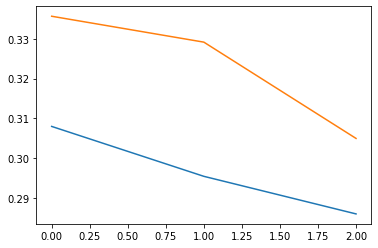

In [32]:
import matplotlib.pyplot as plt

# Train the model and store the training object
training = model.fit(x_train, y_train, validation_split=0.2, epochs=3, batch_size=10)

# Extract the history from the training object
history = training.history

# Plot the training loss 
plt.plot(history['loss'])
# Plot the validation loss
plt.plot(history['val_loss'])

# Show the figure
plt.show()

In [33]:
print(training.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#### Storing the optimal parameters
Model weights stored in an hdf5 file can be reused to populate an untrained model. Once the weights are loaded into this model, it behaves just like a model that has been trained to reach these weights. For example, you can use this model to make predictions from an unseen data set.

In [34]:
from keras.callbacks import ModelCheckpoint

# This checkpoint object will store the model parameters in the file "weights.hdf5"
checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss', save_best_only=True)

# Store in a list to be used during training
callbacks_list = [checkpoint]

# Fit the model on a training set, using the checkpoint as a callback
model.fit(x_train, y_train, validation_split=0.2, epochs=3, callbacks=callbacks_list)


Epoch 1/3
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2599 - accuracy: 0.9068 - val_loss: 0.3014 - val_accuracy: 0.8942
Epoch 2/3
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2585 - accuracy: 0.9069 - val_loss: 0.2967 - val_accuracy: 0.8947
Epoch 3/3
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2552 - accuracy: 0.9081 - val_loss: 0.3074 - val_accuracy: 0.8904


#### Using stored weights to predict in a test set

In [35]:
# Load the weights from file
model.load_weights('weights.hdf5')

# Predict from the first three images in the test data
predictions = model.predict(x_test[0:3]) 

# Print predicted classes of first 3 images 
print(np.argmax(predictions, axis=1))

[9 2 1]


### Neural Network regularization

#### Adding dropout to your network
Dropout is a form of regularization that removes a different random subset of the units in a layer in each round of training

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout

model = Sequential()

# Add a convolutional layer (15 units)
model.add(Conv2D(15, kernel_size=2, activation='relu', input_shape=input_shape))

# Add a pooling operation
model.add(Dropout(0.2))

# Add another convolutional layer (5 units)
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 27, 27, 15)        75        
_________________________________________________________________
dropout (Dropout)            (None, 27, 27, 15)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 5)         305       
_________________________________________________________________
flatten_5 (Flatten)          (None, 3380)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                33810     
Total params: 34,190
Trainable params: 34,190
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model to training data 
model.fit(x_train, y_train, validation_split=0.2, epochs=3)

# Evaluate the model on test data
model.evaluate(x_test, y_test)

Epoch 1/3
1500/1500 [==============================] - 18s 12ms/step - loss: 0.5299 - accuracy: 0.8127 - val_loss: 0.4070 - val_accuracy: 0.8513
Epoch 2/3
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3756 - accuracy: 0.8672 - val_loss: 0.3527 - val_accuracy: 0.8721
Epoch 3/3
313/313 [==============================] - 2s 4ms/step - loss: 0.3642 - accuracy: 0.8707


[0.3641771674156189, 0.8707000017166138]

#### Add batch normalization to your network
Batch normalization is another form of regularization that rescales the outputs of a layer to make sure that they have mean 0 and standard deviation 1

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization 

model = Sequential()

# Add a convolutional layer (15 units)
model.add(Conv2D(15, kernel_size=2, activation='relu', input_shape=input_shape))

# Add a pooling operation
model.add(BatchNormalization ())

# Add another convolutional layer (5 units)
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 27, 27, 15)        75        
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 15)        60        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 5)         305       
_________________________________________________________________
flatten_6 (Flatten)          (None, 3380)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                33810     
Total params: 34,250
Trainable params: 34,220
Non-trainable params: 30
_________________________________________________________________


In [39]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model to training data 
model.fit(x_train, y_train, validation_split=0.2, epochs=3)

# Evaluate the model on test data
model.evaluate(x_test, y_test)

Epoch 1/3
1500/1500 [==============================] - 27s 18ms/step - loss: 0.4161 - accuracy: 0.8506 - val_loss: 0.3705 - val_accuracy: 0.8673
Epoch 2/3
1500/1500 [==============================] - 26s 17ms/step - loss: 0.2965 - accuracy: 0.8942 - val_loss: 0.3076 - val_accuracy: 0.8915
Epoch 3/3
313/313 [==============================] - 2s 5ms/step - loss: 0.3146 - accuracy: 0.8896


[0.31457701325416565, 0.8895999789237976]

### Interpreting the model

#### Extracting a kernel from a trained network
One way to interpret models is to examine the properties of the kernels in the convolutional layers. In this exercise, you will extract one of the kernels from a convolutional neural network with weights that you saved in a hdf5 file.

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D

model = Sequential()

# Add a convolutional layer (15 units)
model.add(Conv2D(15, kernel_size=2, activation='relu', input_shape=input_shape))

# Add a pooling operation
model.add(MaxPool2D(2))

# Add another convolutional layer (5 units)
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [80]:
# Load the weights into the model
model.load_weights('weights.hdf5')

# Get the first convolutional layer from the model
c1 = model.layers[0]

# Get the weights of the first convolutional layer
weights1 = c1.get_weights()

# Pull out the first channel of the first kernel in the first layer
kernel_1 = weights1[0][...,0, 0]
# Pull out the first channel of the second kernel in the first layer
kernel_2 = weights1[0][...,0, 1]
# Pull out the first channel of the third kernel in the first layer
kernel_3 = weights1[0][...,0, 2]
# Pull out the first channel of the fourth kernel in the first layer
kernel_4 = weights1[0][...,0, 3]


#### Shape of the weights
A Keras neural network stores its layers in a list called model.layers. For the convolutional layers, you can get the weights using the .get_weights() method. This returns a list, and the first item in this list is an array representing the weights of the convolutional kernels.

In [81]:
weights1[0].shape

(2, 2, 1, 15)

2, 2 =kernel size ; 1 = colour channel; 15 = Conv2D units 

#### Visualizing kernel responses
One of the ways to interpret the weights of a neural network is to see how the kernels stored in these weights "see" the world. That is, what properties of an image are emphasized by this kernel.

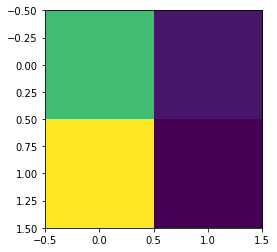

In [83]:
plt.imshow(kernel_1)

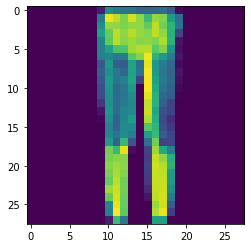

In [84]:
test_image = x_test[3, :, :, 0]
plt.imshow(test_image)

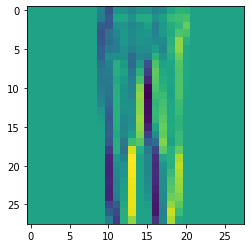

In [85]:
import cv2

img = cv2.filter2D(test_image, -1, kernel_1)
plt.imshow(img)

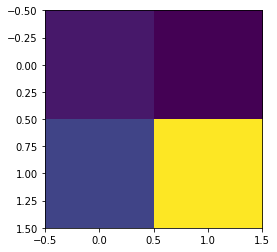

In [86]:
plt.imshow(kernel_2)

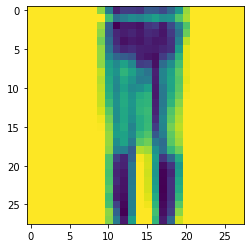

In [87]:
img = cv2.filter2D(test_image, -1, kernel_2)
plt.imshow(img)

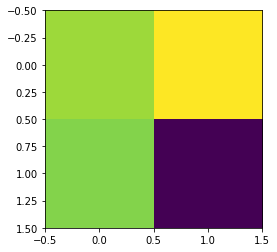

In [88]:
plt.imshow(kernel_3)

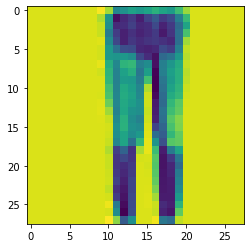

In [90]:
img = cv2.filter2D(test_image, -1, kernel_4)
plt.imshow(img)

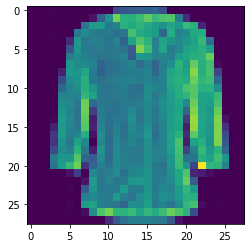

In [91]:
test_image = x_test[4, :, :, 0]
plt.imshow(test_image)

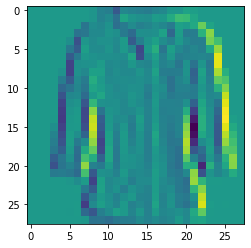

In [92]:
img = cv2.filter2D(test_image, -1, kernel_1)
plt.imshow(img)

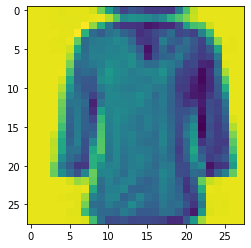

In [93]:
img = cv2.filter2D(test_image, -1, kernel_2)
plt.imshow(img)

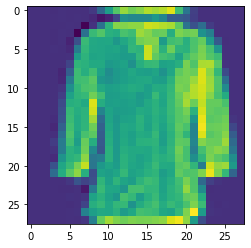

In [94]:
img = cv2.filter2D(test_image, -1, kernel_3)
plt.imshow(img)

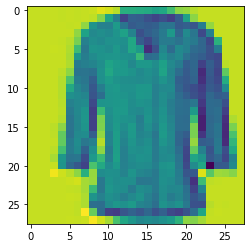

In [95]:
img = cv2.filter2D(test_image, -1, kernel_4)
plt.imshow(img)